# A. Python demonstration: Information in the Frequency domain


### Description
We are given a recording of a note played on the piano.
Our goal is to figure out: 
<font color='red'> what note was it? </font>

<img src="notes.png">

Before everything, we need to load (**import** in Python terminology) a few useful libraries (**modules**). This will allow us to use *third-party code*.

In [1]:
""" Some necessary initialization """
# Numpy: Numerical computing with arrays and matrices
import numpy as np

# allows matplotlib charts to be displayed inside the notebook
%matplotlib inline  
import matplotlib.pyplot as plt

# let us read .wav audio files
from scipy.io import wavfile
#help(wavfile)

# let us play audio in Jupyter
from IPython.display import Audio

- [numpy](https://numpy.org/): Perhaps the most fundamental package for scientific computing with Python. It contains among other things: useful linear algebra, **Fourier transform**, and random number capabilities.

- [matplotlib](https://matplotlib.org/): a Python 2D plotting library which produces publication quality figures.You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc.

### Let's play the note

* The text file `piano.txt` contains sampled values from recording a note played on the piano at the rate of 44.1kHz

(Think of these numbers as the "position" of the speakers. The **rate** indicates that the speakers have to "go to this position" 44100 times per second.)

<font color='magenta'> **[1pt]** </font>

In [103]:
ys = np.loadtxt("piano.txt") # load the array into the variable ys

fs =  44100 # sample rate (Hz)

# Create an audio object using these numbers that makes the speakers vibrate according to these numbers and generate these piano note
Audio(ys,rate=fs) 

ValueError: rate must be specified when data is a numpy array or list of audio samples.

Note how Python makes this VERY VERY easy :)

But, let's see: **Who has a perfect pitch? anyone can identify the note?!**

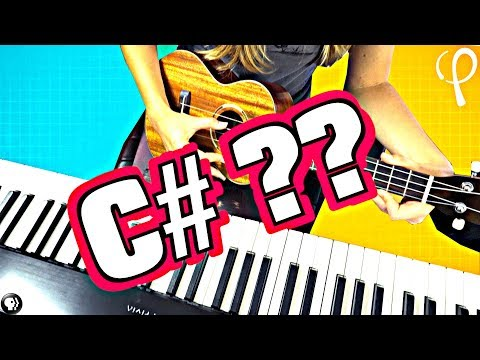

In [4]:
"""Are you this person? :)"""

from IPython.display import YouTubeVideo
# The original URL is:
#   https://www.youtube.com/watch?v=-65FMJTKGLs
YouTubeVideo("-65FMJTKGLs",start=48)

### A hint!

* When a piano note is played it generates a pressure wave. 

* Essentially, what determines the note is *how fast the pressure waves oscillate over time*

### Graph the audio waveform

Let's try graph the audio signal.

* We will plot how the pressure waves look like over **time**!

Maybe that helps find how fast the wave oscillates...

<font color='magenta'> **[2pts]** </font>

(0, 3)

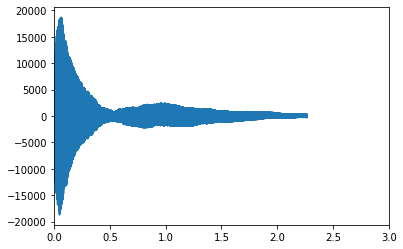

In [96]:
N = ys.size  # number of samples
fs = 44100   # sample rate (Hz)
L = 2.2675     # Length of the audio clip (sec)

# we need N time inputs. divide interval [0,L] in N equally spaced points
ts = np.linspace(0, L, N)

# We can now plot!
fig, ax = plt.subplots()
ax.plot(ts,ys)
ax.set_xlim(0,3)

In the shell above use the command `ax.set_xlim(x1,x2)` to zoom in the plot by specifying the limits of the x axis. 

Again, note how Python makes this VERY VERY easy :)

But, it does **not** seem that the audio waveform can help identify the note!

### Frequency representation

We will now show how to make a different plot of the signal.

We will calculate and plot an equivalent representation called the **frequency or Fourier representation**.

The representation shows which frequencies govern the signal. 

Frequencies tell us how fast the wave oscillates.

The **Discrete Fourier Transform (DFT)** takes that signal from the timed-domain representation to an equivalent frequency domain representation.

$$\{y[k], k=0,1,\ldots,N-1\} \rightarrow \{Y[k], k=0,1,\ldots,N-1\}$$

Each $|Y[k]|$ measures how much the frequency $f_k = k\cdot f_1$ is present in the audio signal, where $f_1=\frac{1}{L}$ is the **fundamental** frequency.

Let's create this frequency representation of the signal.
First, we create the frequency set $f_k, k=0,1,\ldots,N-1$.

Here, the fundamental frequency is $f_1=1/L=0.441$ Hz.

The DFT is able to detect multiples of this frequency, which we call harmonics.

#### Frequency set $\{f_k\}_0^{N-1}$

<font color='magenta'> **[2pts]** </font>

In [97]:
# print(1/L) 
f1 = 1/L                   # fundamental frequency
k = np.arange(N)              # 0 to N-1
freqs = k*f1              # harmonics

> <font color='magenta'> **[1pt]** </font> In the next shell write code to print the fundamental frequency and the first 10 frequencies.

In [98]:
"""Print frequencies"""
print(f1)
for x in range(10):
    print(freqs[x])

0.4410143329658214
0.0
0.4410143329658214
0.8820286659316428
1.3230429988974641
1.7640573318632855
2.2050716648291067
2.6460859977949283
3.08710033076075
3.528114663726571
3.969128996692392


#### Compute the Fourier representation by call the FFT algorithm

In [99]:
# Call the Fast Fourier Transform FFT
yk = np.fft.fft(ys)

> <font color='magenta'> **[2pts]** </font> Print the output of the FFT. Try calling the function `np.isreal` with yk as its argument. What is the output?

In [100]:
"""Print yk"""
print(yk)
"""Call the function np.isreal"""
np.isreal(yk)

[3032935.          +0.j           -3355.02064285-926.70033855j
   -5012.74570321+702.79671063j ...   -4511.55926522 +66.06749993j
   -5012.74570321-702.79671063j   -3355.02064285+926.70033855j]


array([ True, False, False, ..., False, False, False])

> <font color='magenta'> **[1pt]** </font> What do you conclude about the nature of the entries of the vector yk?. Answer in the cell below.

In [101]:
print("It is recorded in a complex plane as a complex number,\n\
which is intuitive for describing any thing with a period")

It is recorded in a complex plane as a complex number,
which is intuitive for describing any thing with a period


#### Graph the frequency domain representation

> <font color='magenta'> **[1pt]** </font>Fill in the dots (...) in the shell below to plot the **magnitude** of the Fourier transform (ie, of the vector yk).

*(Hint: numpy has a function that computes the magnitude of a complex number. Google it & use it!)

(0, 5000)

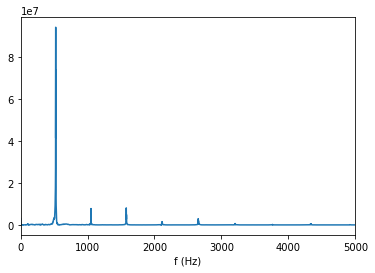

In [102]:
fig, ax = plt.subplots()
ax.plot(freqs,abs(yk))
ax.set_xlabel("f (Hz)")
ax.set_xlim(0,5000)

> <font color='magenta'> **[2pts]** </font> By looking at your plot above, answer in the cell below: What is the **fundamental frequency of the signal ys**?

#### ...520Hz

> <font color='magenta'> **[1pts]** </font> Use the table [here](https://en.wikipedia.org/wiki/C_(musical_note)#Designation_by_octave) to find **which note was this?**

In [90]:
print("C5")

C5


I hope you enjoyed this :)
Only with a few lines of code, we were able mathematically extract the content of the signal!

> <font color='magenta'> **[2pts]** </font> Write code in the next shell that plots the **phase** of the Fourier Transform. 

(Remember: The frequency representation carries information about the signal both in the magnitude and in the phase. The phase information can also be important! We wil see examples of this soon!)

(0, 5000)

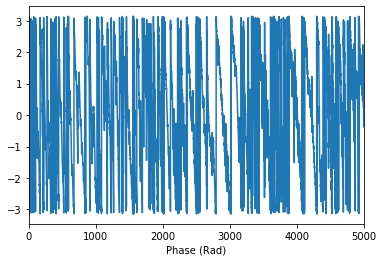

In [93]:
"""Plot the phase of yk"""
fig, ax = plt.subplots()
ax.plot(freqs,np.angle(yk))
ax.set_xlabel("Phase (Rad)")
ax.set_xlim(0,5000)